In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters':
  os.chdir(r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.

/var/folders/l7/qksjftz12pz0s32y0l3jd4k4cyyb65/T/ipykernel_11617/4212331884.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


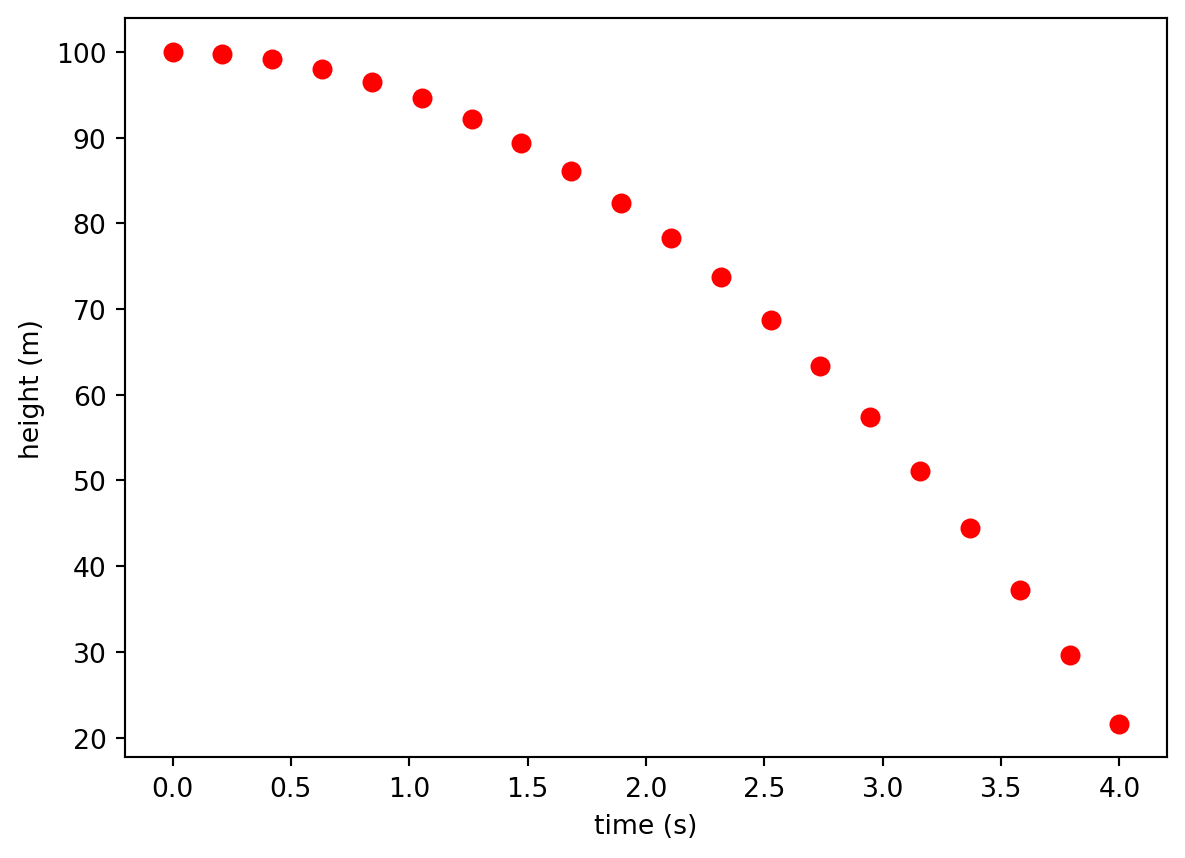

In [2]:
#| echo: false
from numpy import linspace
from matplotlib import pyplot as plt

t = linspace(0,4,20)
h = 100
y = 100 -4.9 * t**2

plt.plot(t,y,'r.',ms = 13)
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.show()

(0.75, 3.5, 6.5, 8.25)

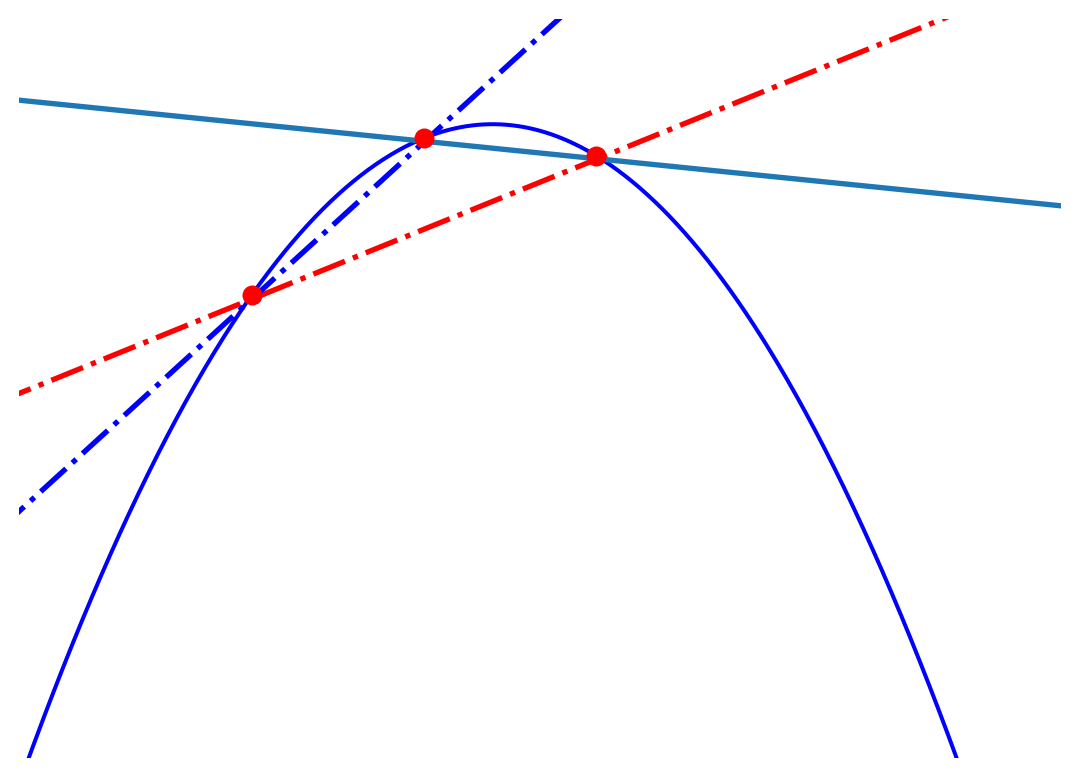

In [3]:
#| echo: false
#| layout-ncol: 1
#| fig-cap: 
#|   - "Figure 1: Illustration of the forward difference derivative (blue solid line), the backward difference (blue dashed line) and the center difference (red dashed line)"
#| fig-cap-location: bottom



from numpy import linspace
from matplotlib import pyplot as plt

x = linspace(0,5,12)
y = -(x - 2)**2 + 8

xDense = linspace(0,5,1000)
yDense = -(xDense - 2)**2 + 8
slopeOne = (y[5] - y[3])/(x[5] - x[3])
slopeTwo = (y[4] - y[3])/(x[4] - x[3])
slopeThree = (y[5] - y[4])/(x[5] - x[4])


lineOne =  slopeOne * xDense + 7.09
lineTwo =  slopeTwo * xDense + 6.47

lineThree =  slopeThree * xDense + 8.125

plt.plot(xDense,yDense,'b')
plt.plot(xDense,lineOne,'r-.',lw = 2)
plt.plot(xDense,lineTwo,'b-.',lw = 2)
plt.plot(xDense,lineThree,lw = 2)
plt.plot(x[3:6],y[3:6],'r.',ms = 13)
plt.ylim(6.5,8.25)
plt.xlim(0.75,3.5)
plt.axis("off")


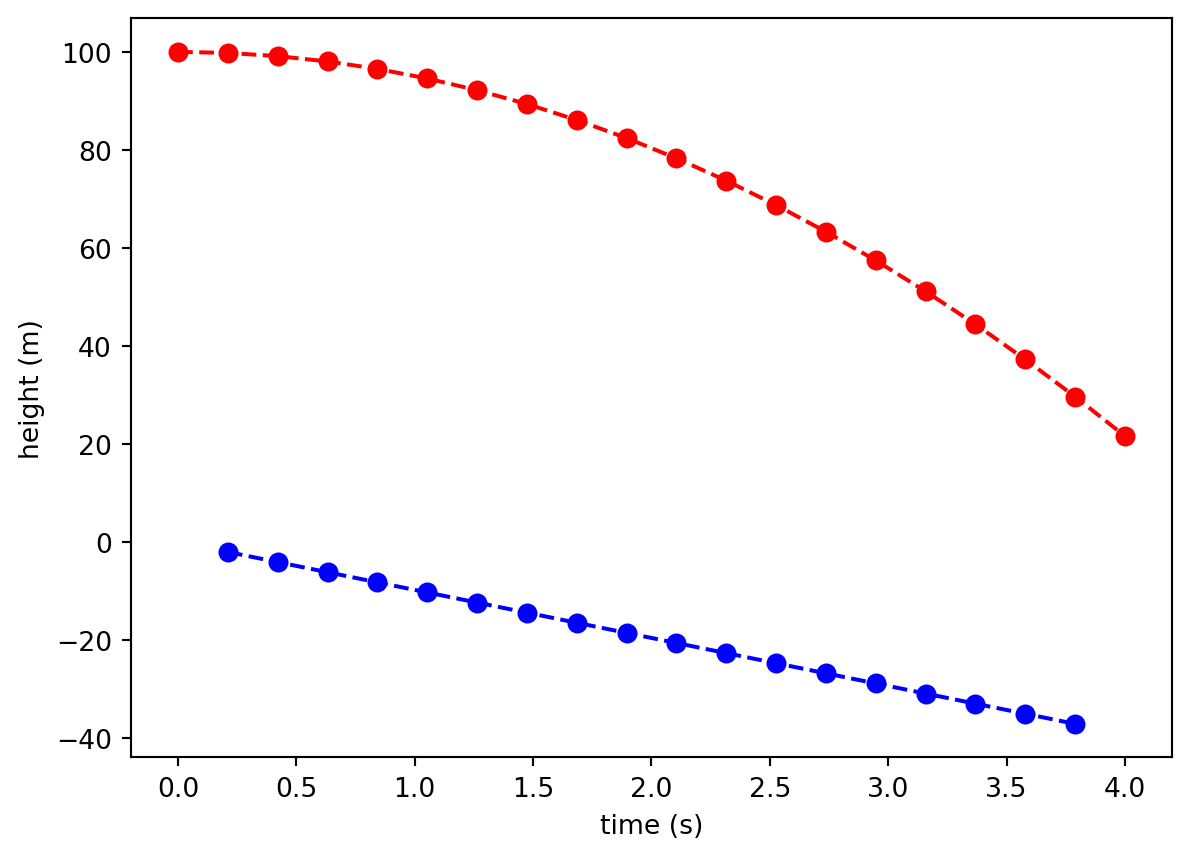

In [4]:
from numpy import linspace,array
from matplotlib import pyplot as plt

t = array([0.0, 0.21052631578947367, 0.42105263157894735, 0.631578947368421, 0.8421052631578947, 1.0526315789473684, 1.263157894736842, 1.4736842105263157, 1.6842105263157894, 1.894736842105263, 2.1052631578947367, 2.3157894736842106, 2.526315789473684, 2.7368421052631575, 2.9473684210526314, 3.1578947368421053, 3.3684210526315788, 3.578947368421052, 3.789473684210526, 4.0])
y = array([100.0, 99.78282548476454, 99.13130193905818, 98.04542936288088, 96.52520775623269, 94.57063711911357, 92.18171745152354, 89.35844875346261, 86.10083102493076, 82.40886426592797, 78.2825484764543, 73.72188365650969, 68.72686980609419, 63.29750692520776, 57.43379501385042, 51.13573407202215, 44.403324099722994, 37.23656509695292, 29.63545706371191, 21.599999999999994])

dt = t[1] - t[0]
yprime = (y[2:] - y[:-2])/(2 * dt)

plt.plot(t,y,'r--.',ms = 13)
plt.plot(t[1:-1],yprime,'b--.',ms = 13)
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.show()

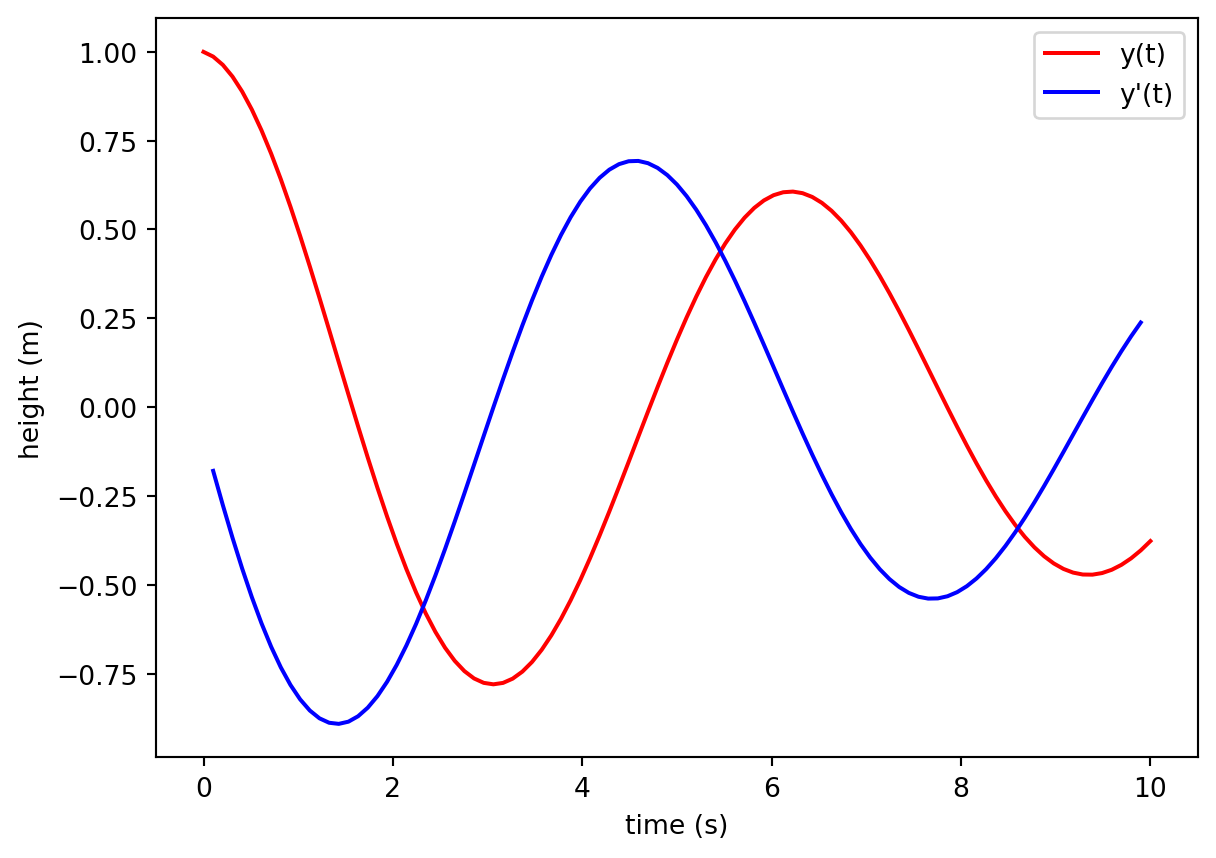

In [5]:
from numpy import array

t = array([0.0, 0.10204081632653061, 0.20408163265306123, 0.30612244897959184, 0.40816326530612246, 0.5102040816326531, 0.6122448979591837, 0.7142857142857143, 0.8163265306122449, 0.9183673469387755, 1.0204081632653061, 1.1224489795918369, 1.2244897959183674, 1.3265306122448979, 1.4285714285714286, 1.5306122448979593, 1.6326530612244898, 1.7346938775510203, 1.836734693877551, 1.9387755102040818, 2.0408163265306123, 2.142857142857143, 2.2448979591836737, 2.3469387755102042, 2.4489795918367347, 2.5510204081632653, 2.6530612244897958, 2.7551020408163267, 2.857142857142857, 2.9591836734693877, 3.0612244897959187, 3.163265306122449, 3.2653061224489797, 3.36734693877551, 3.4693877551020407, 3.5714285714285716, 3.673469387755102, 3.7755102040816326, 3.8775510204081636, 3.979591836734694, 4.081632653061225, 4.183673469387755, 4.285714285714286, 4.387755102040816, 4.4897959183673475, 4.591836734693878, 4.6938775510204085, 4.795918367346939, 4.8979591836734695, 5.0, 5.1020408163265305, 5.204081632653061, 5.3061224489795915, 5.408163265306123, 5.510204081632653, 5.612244897959184, 5.714285714285714, 5.816326530612245, 5.918367346938775, 6.020408163265306, 6.122448979591837, 6.224489795918368, 6.326530612244898, 6.428571428571429, 6.530612244897959, 6.63265306122449, 6.73469387755102, 6.836734693877551, 6.938775510204081, 7.040816326530613, 7.142857142857143, 7.244897959183674, 7.346938775510204, 7.448979591836735, 7.551020408163265, 7.653061224489796, 7.755102040816327, 7.857142857142858, 7.959183673469388, 8.061224489795919, 8.16326530612245, 8.26530612244898, 8.36734693877551, 8.46938775510204, 8.571428571428571, 8.673469387755102, 8.775510204081632, 8.877551020408163, 8.979591836734695, 9.081632653061225, 9.183673469387756, 9.285714285714286, 9.387755102040817, 9.489795918367347, 9.591836734693878, 9.693877551020408, 9.795918367346939, 9.89795918367347, 10.0])

y = array([1.0, 0.9867106049449835, 0.9633896110036303, 0.930441653845362, 0.8883647907109408, 0.8377438153135915, 0.7792427802562372, 0.7135968174516216, 0.641603352856869, 0.5641128165642914, 0.4820189528946211, 0.3962488375981065, 0.30775271057607917, 0.217493732695753, 0.12643777430107145, 0.03554334095074269, -0.05424826121944644, -0.1420224222596137, -0.22690029414347004, -0.30804733831471925, -0.38468127466905855, -0.4560793591162092, -0.5215849250188013, -0.5806131324972382, -0.6326558787228784, -0.6772858317939752, -0.7141595604960038, -0.743019742085619, -0.7636964401012755, -0.7761074539906521, -0.7802577519550382, -0.7762380077468505, -0.7642222711259269, -0.7444648101959878, -0.7172961718235661, -0.6831185137135822, -0.6424002684118669, -0.5956702054667365, -0.5435109631591742, -0.4865521255631921, -0.42546292419273285, -0.3609446461065957, -0.29372283206542116, -0.2245393491613234, -0.15414442227722988, -0.083288707794463, -0.012715491177467673, 0.05684691254372852, 0.12469247975946875, 0.19014444921827992, 0.2525618761933174, 0.31134570856282195, 0.36594432944772914, 0.4158585174857275, 0.4606457826610142, 0.49992404277520236, 0.5333746130575407, 0.5607444889909092, 0.5818479100925077, 0.5965672000538682, 0.6048528862341104, 0.60672310893566, 0.6022623380982411, 0.5916194219536842, 0.5750049987241208, 0.5526883085574614, 0.5249934485201562, 0.49229511855756375, 0.45501391084259973, 0.4136111988262666, 0.3685836855487481, 0.32045767334377057, 0.26978311895604673, 0.21712753928331918, 0.16306983344972584, 0.10819408672204209, 0.0530834209080176, -0.0016860456534446109, -0.05555106756061642, -0.10796691308417367, -0.15841272129543982, -0.20639652454758026, -0.2514598895714763, -0.29318213516550146, -0.33118408953590006, -0.36513135572337047, -0.3947370591710421, -0.41976405728705063, -0.4400265967682593, -0.45539141041706666, -0.4657782511379014, -0.4711598666822405, -0.47156142446092897, -0.46705940130261336, -0.45777995835259105, -0.44389682632607497, -0.4256287310064338, -0.4032363931693947, -0.3770191409801755])

from matplotlib import pyplot as plt

dt = t[1] - t[0]
yprime = (y[2:] - y[:-2])/(2 * dt)

plt.plot(t,y,'r',label = 'y(t)')
plt.plot(t[1:-1],yprime,'b',label = "y'(t)")
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.legend()


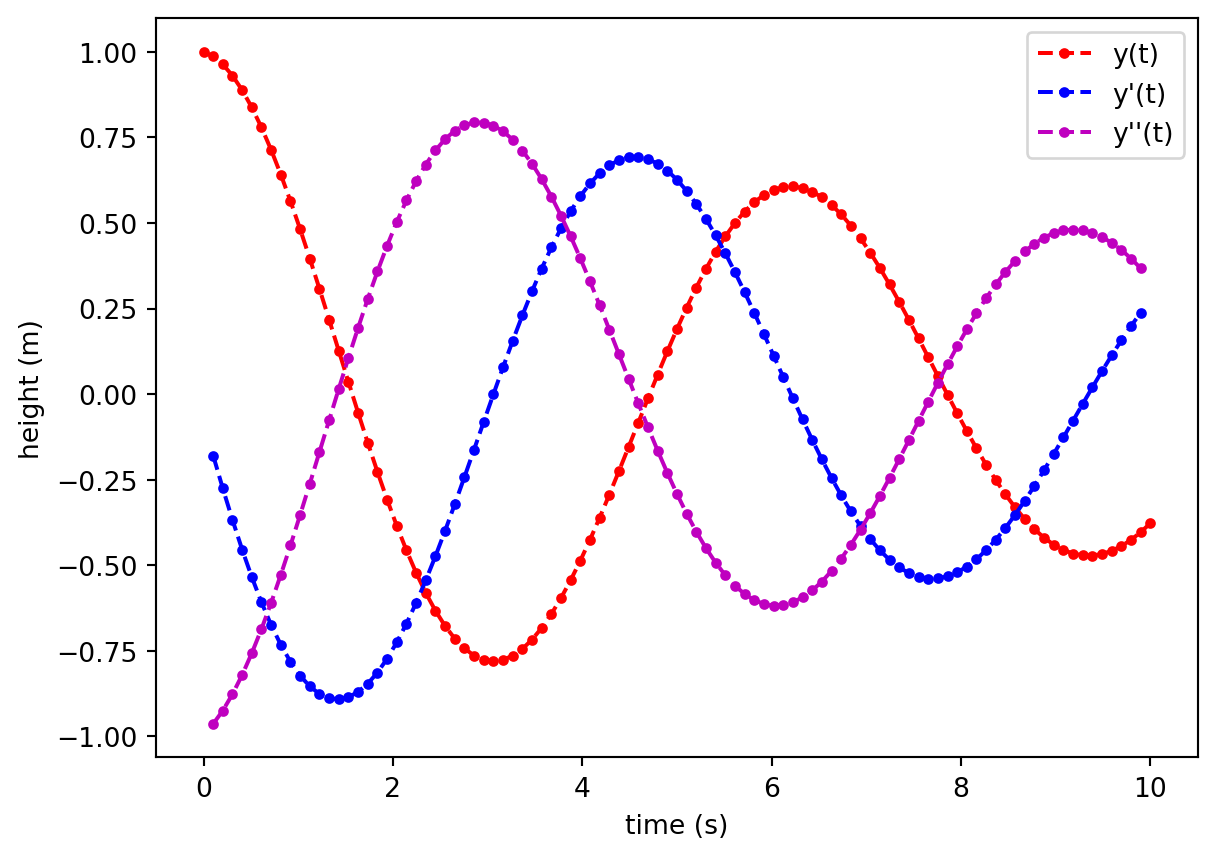

In [6]:
from numpy import array

t = array([0.0, 0.10204081632653061, 0.20408163265306123, 0.30612244897959184, 0.40816326530612246, 0.5102040816326531, 0.6122448979591837, 0.7142857142857143, 0.8163265306122449, 0.9183673469387755, 1.0204081632653061, 1.1224489795918369, 1.2244897959183674, 1.3265306122448979, 1.4285714285714286, 1.5306122448979593, 1.6326530612244898, 1.7346938775510203, 1.836734693877551, 1.9387755102040818, 2.0408163265306123, 2.142857142857143, 2.2448979591836737, 2.3469387755102042, 2.4489795918367347, 2.5510204081632653, 2.6530612244897958, 2.7551020408163267, 2.857142857142857, 2.9591836734693877, 3.0612244897959187, 3.163265306122449, 3.2653061224489797, 3.36734693877551, 3.4693877551020407, 3.5714285714285716, 3.673469387755102, 3.7755102040816326, 3.8775510204081636, 3.979591836734694, 4.081632653061225, 4.183673469387755, 4.285714285714286, 4.387755102040816, 4.4897959183673475, 4.591836734693878, 4.6938775510204085, 4.795918367346939, 4.8979591836734695, 5.0, 5.1020408163265305, 5.204081632653061, 5.3061224489795915, 5.408163265306123, 5.510204081632653, 5.612244897959184, 5.714285714285714, 5.816326530612245, 5.918367346938775, 6.020408163265306, 6.122448979591837, 6.224489795918368, 6.326530612244898, 6.428571428571429, 6.530612244897959, 6.63265306122449, 6.73469387755102, 6.836734693877551, 6.938775510204081, 7.040816326530613, 7.142857142857143, 7.244897959183674, 7.346938775510204, 7.448979591836735, 7.551020408163265, 7.653061224489796, 7.755102040816327, 7.857142857142858, 7.959183673469388, 8.061224489795919, 8.16326530612245, 8.26530612244898, 8.36734693877551, 8.46938775510204, 8.571428571428571, 8.673469387755102, 8.775510204081632, 8.877551020408163, 8.979591836734695, 9.081632653061225, 9.183673469387756, 9.285714285714286, 9.387755102040817, 9.489795918367347, 9.591836734693878, 9.693877551020408, 9.795918367346939, 9.89795918367347, 10.0])

y = array([1.0, 0.9867106049449835, 0.9633896110036303, 0.930441653845362, 0.8883647907109408, 0.8377438153135915, 0.7792427802562372, 0.7135968174516216, 0.641603352856869, 0.5641128165642914, 0.4820189528946211, 0.3962488375981065, 0.30775271057607917, 0.217493732695753, 0.12643777430107145, 0.03554334095074269, -0.05424826121944644, -0.1420224222596137, -0.22690029414347004, -0.30804733831471925, -0.38468127466905855, -0.4560793591162092, -0.5215849250188013, -0.5806131324972382, -0.6326558787228784, -0.6772858317939752, -0.7141595604960038, -0.743019742085619, -0.7636964401012755, -0.7761074539906521, -0.7802577519550382, -0.7762380077468505, -0.7642222711259269, -0.7444648101959878, -0.7172961718235661, -0.6831185137135822, -0.6424002684118669, -0.5956702054667365, -0.5435109631591742, -0.4865521255631921, -0.42546292419273285, -0.3609446461065957, -0.29372283206542116, -0.2245393491613234, -0.15414442227722988, -0.083288707794463, -0.012715491177467673, 0.05684691254372852, 0.12469247975946875, 0.19014444921827992, 0.2525618761933174, 0.31134570856282195, 0.36594432944772914, 0.4158585174857275, 0.4606457826610142, 0.49992404277520236, 0.5333746130575407, 0.5607444889909092, 0.5818479100925077, 0.5965672000538682, 0.6048528862341104, 0.60672310893566, 0.6022623380982411, 0.5916194219536842, 0.5750049987241208, 0.5526883085574614, 0.5249934485201562, 0.49229511855756375, 0.45501391084259973, 0.4136111988262666, 0.3685836855487481, 0.32045767334377057, 0.26978311895604673, 0.21712753928331918, 0.16306983344972584, 0.10819408672204209, 0.0530834209080176, -0.0016860456534446109, -0.05555106756061642, -0.10796691308417367, -0.15841272129543982, -0.20639652454758026, -0.2514598895714763, -0.29318213516550146, -0.33118408953590006, -0.36513135572337047, -0.3947370591710421, -0.41976405728705063, -0.4400265967682593, -0.45539141041706666, -0.4657782511379014, -0.4711598666822405, -0.47156142446092897, -0.46705940130261336, -0.45777995835259105, -0.44389682632607497, -0.4256287310064338, -0.4032363931693947, -0.3770191409801755])

from matplotlib import pyplot as plt

dt = t[1] - t[0]
yprime = (y[2:] - y[:-2])/(2 * dt)
yprimeprime = (y[2:] - 2 * y[1:-1] + y[:-2])/dt**2
plt.plot(t,y,'r--.',label = 'y(t)')
plt.plot(t[1:-1],yprime,'b--.',label = "y'(t)")
plt.plot(t[1:-1],yprimeprime,'m--.',label = "y''(t)")
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.legend()


(-0.3141592653589793,
 6.5973445725385655,
 -1.0998615404412626,
 1.0998615404412626)

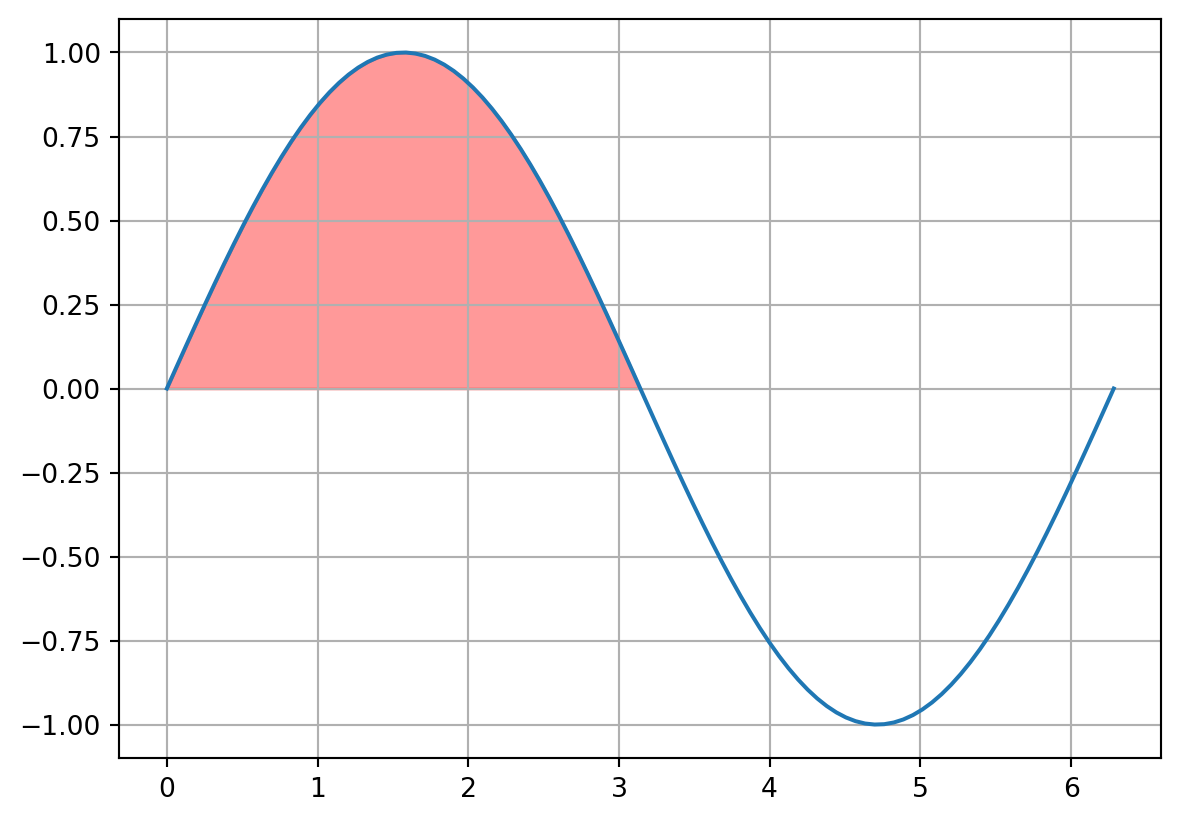

In [7]:
#| echo: false
from numpy import linspace,pi,sin
from matplotlib import pyplot as plt

x = linspace(0,pi,100)
y = sin(x)
xTwo = linspace(0,2 *pi, 100)
yTwo = sin(xTwo)

plt.fill_between(x,y,color = 'r',alpha = 0.4)
plt.plot(xTwo,yTwo)
plt.grid(True)
plt.axis('on')


(-0.6440264939859076,
 6.613052535806514,
 -1.0998615404412626,
 1.0998615404412626)

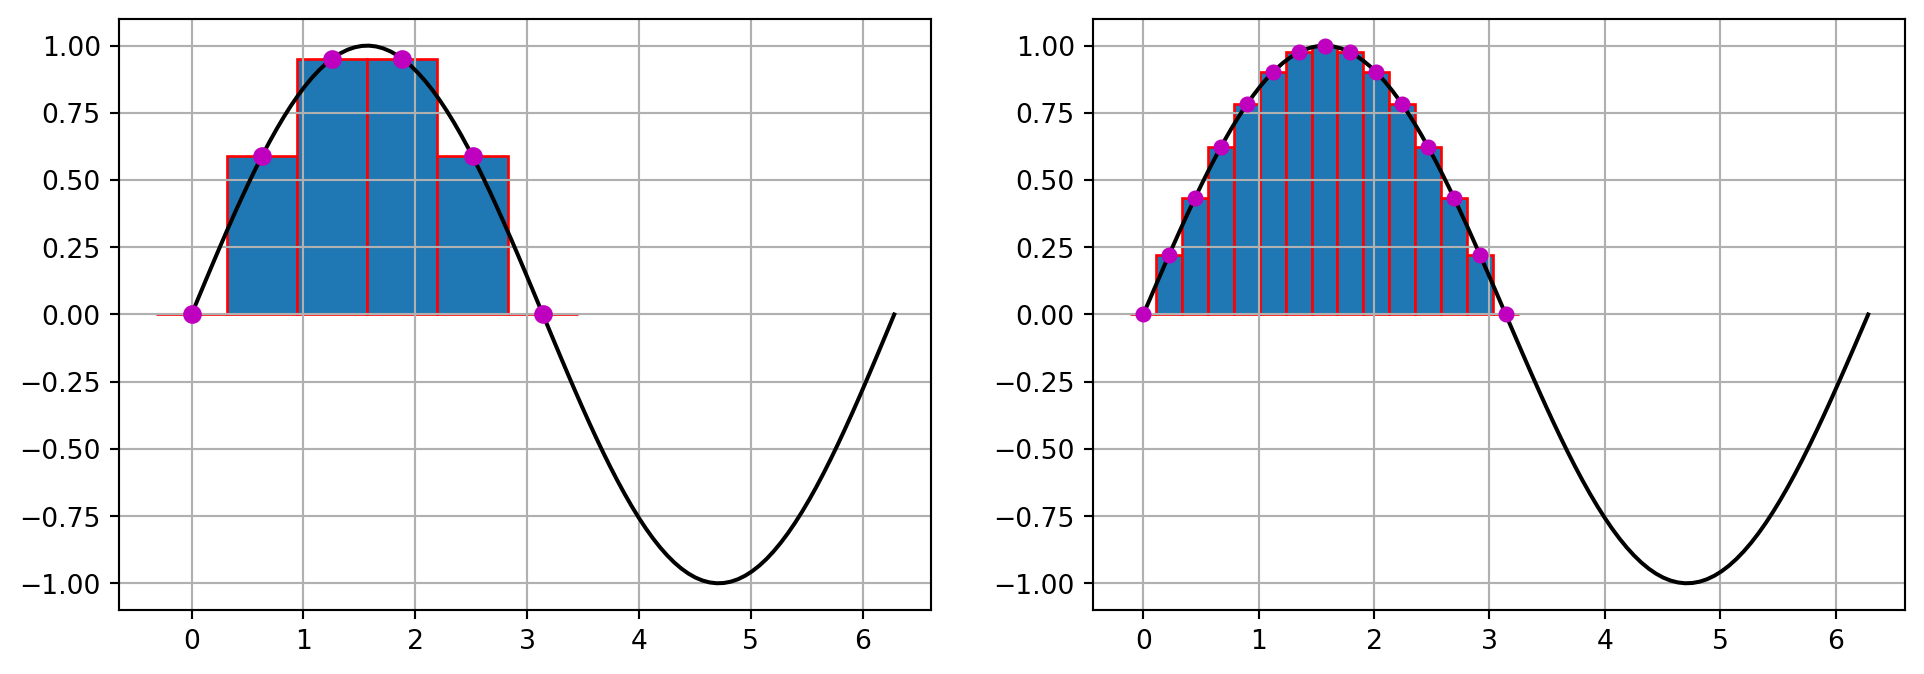

In [8]:
#| echo: false
from numpy import linspace,pi
from matplotlib import pyplot as plt
x = linspace(0,pi,100)
y = sin(x)
xTwo = linspace(0,2 *pi, 100)
yTwo = sin(xTwo)

xCourse,dxCourse = linspace(0,pi,15,retstep = True)
yCourse = sin(xCourse)

xCourseTwo,dxCourseTwo = linspace(0,pi,6,retstep = True)
yCourseTwo = sin(xCourseTwo)

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#plt.fill_between(x,y,color = 'r',alpha = 0.4)
ax2.bar(xCourse,yCourse,edgecolor = "red",width = dxCourse)
ax2.plot(xTwo,yTwo,'k')
ax2.plot(xCourse,yCourse,'m.',ms = 10)
ax2.grid(True)
ax2.axis('on')

ax1.bar(xCourseTwo,yCourseTwo,edgecolor = "red",width = dxCourseTwo)
ax1.plot(xTwo,yTwo,'k')
ax1.plot(xCourseTwo,yCourseTwo,'m.',ms = 12)
ax1.grid(True)
ax1.axis('on')


In [9]:
from numpy import linspace,sin,cos,pi
x,dx = linspace(0,pi,100,retstep=True)
y = sin(x)

integral = dx * sum(y)
print(integral)
print(-(cos(pi) - cos(0)))

1.9998321638939924
2.0


(-0.15707963267948966,
 3.2986722862692828,
 -0.049993706383693756,
 1.049867834057569)

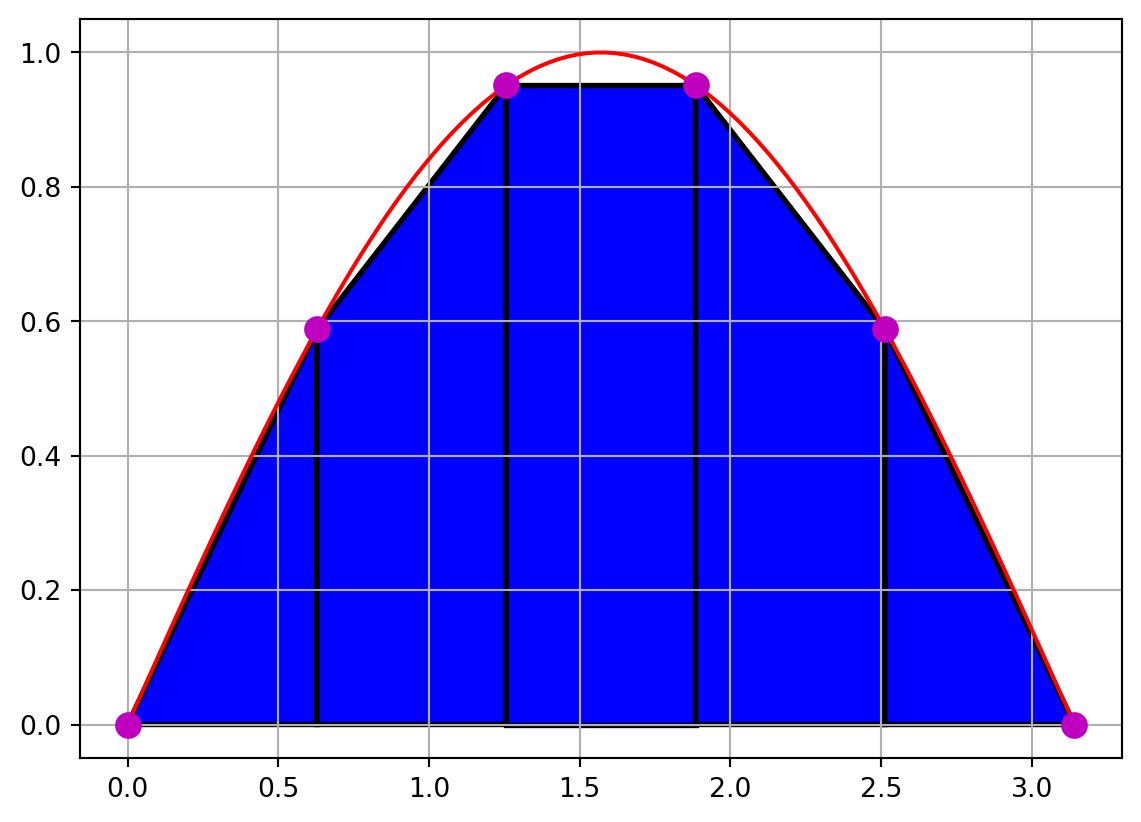

In [10]:
#| echo: false

from numpy import linspace,pi,array
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon



x = linspace(0,pi,100)
y = sin(x)
xTwo = linspace(0,pi, 100)
yTwo = sin(xTwo)

xCourse,dxCourse = linspace(0,pi,6,retstep = True)
yCourse = sin(xCourse)

fig,ax = plt.subplots()
ax.plot(xTwo,yTwo,'r')
ax.plot(xCourse,yCourse,'m.',ms = 18)

for n in range(5):
    y = array([[xCourse[n],0], [xCourse[n+1],0], [xCourse[n+1],yCourse[n+1]], [xCourse[n],yCourse[n]], [xCourse[n],0]]) 
    p = Polygon(y, facecolor = 'b',edgecolor = "k",lw=2)
    ax.add_patch(p)


ax.grid(True)
ax.axis('on')


In [11]:
from numpy import linspace,exp,cos,pi
import sympy as sp
x,dx = linspace(0,pi,6,retstep=True)
y = exp(-0.05 * x) * cos(x)

integralrectangle = dx * sum(y)
integraltrapezoid = dx /2 * (2 * sum(y[1:-1]) + y[0] + y[-1])

xvar = sp.Symbol("x")
expression = sp.exp(-0.05 * xvar) * sp.cos(xvar)
exact = sp.integrate(expression,(xvar,0,sp.pi))

print(integralrectangle)
print(integraltrapezoid)
display(sp.N(exact))

0.14127987124712144
0.0956124235314592


0.0925005485861962

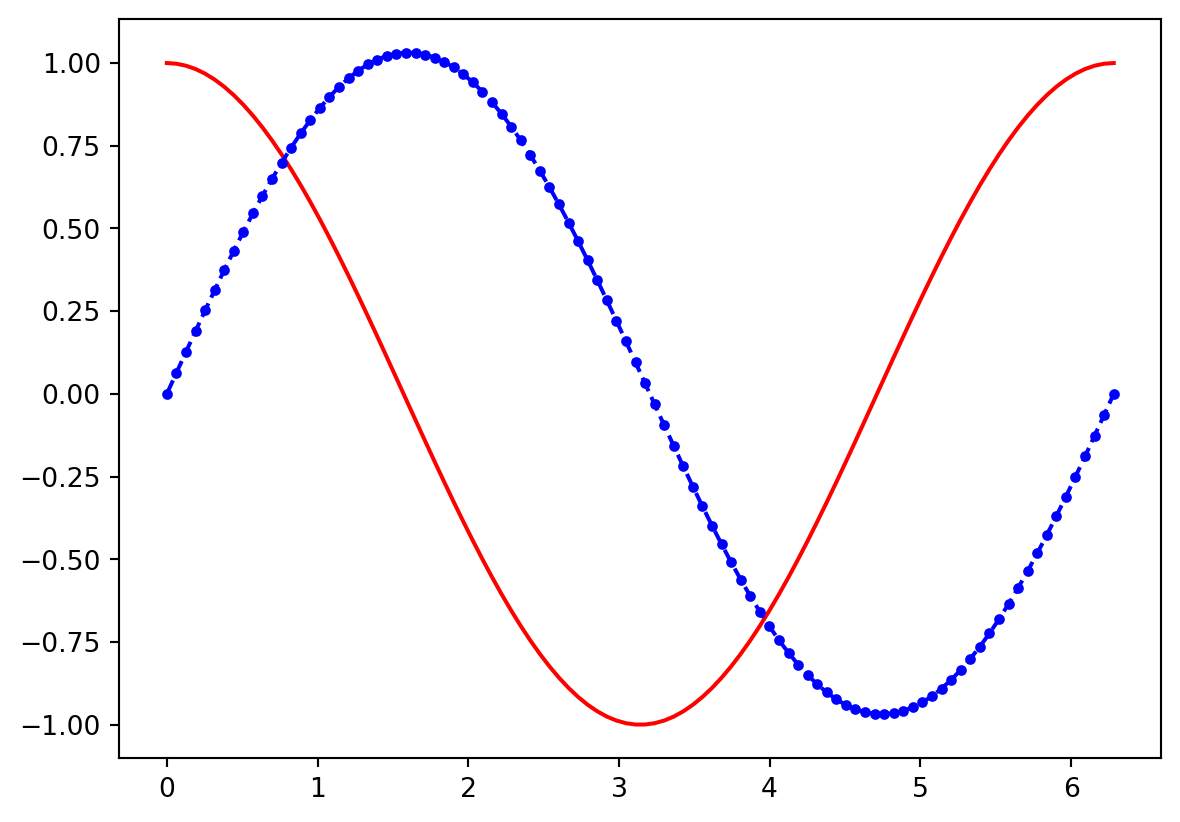

In [12]:
from numpy import linspace, sin,cos,pi
from matplotlib import pyplot as plt

x,dx = linspace(0,2 * pi,100,retstep = True)
y = cos(x)

integral = [dx * sum(y[:n]) for n in range(len(x))]
plt.plot(x,y,'r')
plt.plot(x,integral,'b--.')
plt.show()


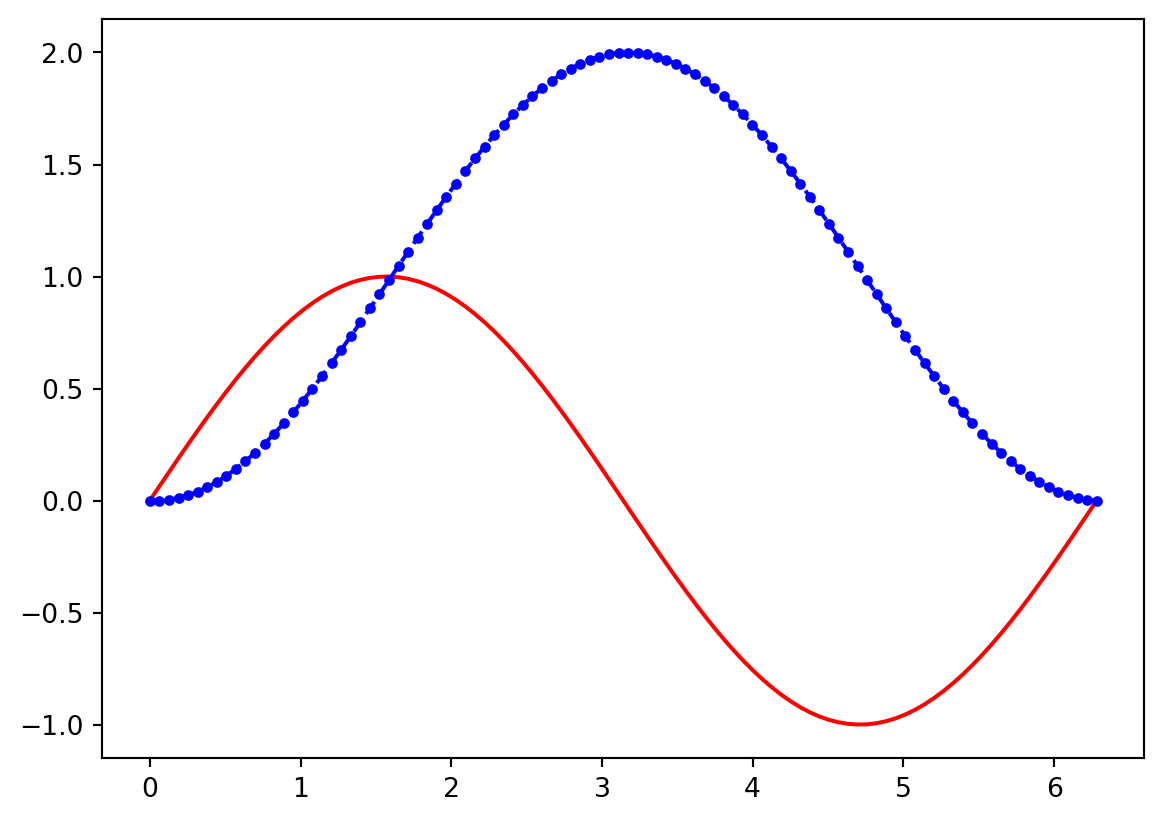

In [13]:
from numpy import linspace, sin,cos,pi
from matplotlib import pyplot as plt

x,dx = linspace(0,2 * pi,100,retstep = True)
y = sin(x)

integral = [dx * sum(y[:n]) for n in range(len(x))]
plt.plot(x,y,'r')
plt.plot(x,integral,'b--.')
plt.show()


In [14]:
# Solution Here

In [15]:
# Solution Here

In [16]:
# Solution Here